In [171]:
import numpy as np 
import matplotlib.pyplot as plt

In [172]:
name1="Materiales/AireMu.txt"
name2="Materiales/PMMAMu.txt"
name3="Materiales/SangreMu.txt"
name4="Materiales/YodoPMu.txt"
MaterialAire = np.genfromtxt(name1)
MaterialPMMA = np.genfromtxt(name2)
MaterialSangre = np.genfromtxt(name3)
MaterialYodoP = np.genfromtxt(name4)

In [173]:
nameC="In-line"
nameV="TPMMAEP"
nameVV="TPMMAE"
nameD="Sangre"
nameF="Aire"
nameL="YodoP"
nameE="R6 - PS"
nameG="R6 - PI"
nameH="R6 - PC"
nameA="R2"
nameB="R5"
nameZ="R6"
name3=nameC+"/"+nameV+"/"+nameD
Npixeles=256
a=5.5*(10**(-5))
z=1.2
zs=0.6
M=(z+zs)/zs
E=12
Ek=E*(10**(3))
E_J=Ek*1.6*(10**(-19))
h=6.63*10**(-34)
c=3*(10**(8))
k=(2*np.pi*E_J)/(h*c)
delta_mP=MaterialPMMA[E-1][1] # PMMA
mu_mP=MaterialPMMA[E-1][0]
delta_muestraA=MaterialAire[E-1][1] # Aire
mu_muestraA=MaterialAire[E-1][0]
delta_muestraS=MaterialSangre[E-1][1] # Sangre
mu_muestraS=MaterialSangre[E-1][0]
delta_muestraY=MaterialYodoP[E-1][1] # YodoP
mu_muestraY=MaterialYodoP[E-1][0]
x=np.arange(0,Npixeles,1)
x_mm = np.multiply(x,np.round((a*(10**(3)))/M,4))

In [174]:
def func(x,r,PosX):
    k=np.sqrt(r**2 - ((PosX-x))**2)
    return k

In [175]:
def Tub(X1,X2,Npixeles):
    Thick=np.zeros((Npixeles,Npixeles))
    E=np.concatenate((np.zeros(X1),2*func(x[X1:X2],(X2-X1)/2,(X1+X2)/2),np.zeros(Npixeles-X2)))
    for i in range(Npixeles):
        Thick[i,]=E
    return Thick

In [176]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [177]:
X1=102 #1.94 
X2=152
XX1=75       
XX2=180
X3=77 #2.93 
X4=178
XX3=51      
XX4=204
X5=52 #3.85 
X6=204
XX5=22     
XX6=233
#####################################
X7=45 #3.85 
X8=211
TmE=(Tub(X1,X2,Npixeles)*a)/M
TmS=(Tub(X3,X4,Npixeles)*a)/M
TmF=(Tub(X5,X6,Npixeles)*a)/M
TTmE=(Tub(XX1,XX2,Npixeles)*a)/M
TTmS=(Tub(XX3,XX4,Npixeles)*a)/M
TTmF=(Tub(XX5,XX6,Npixeles)*a)/M
TestEsC=PI(TmE,0,Npixeles,0,Npixeles)
TestSiC=PI(TmS,0,Npixeles,0,Npixeles)
TestSiF=PI(TmF,0,Npixeles,0,Npixeles)
TTestEsC=PI(TTmE,0,Npixeles,0,Npixeles)
TTestSiC=PI(TTmS,0,Npixeles,0,Npixeles)
TTestSiF=PI(TTmF,0,Npixeles,0,Npixeles)
#####################################
TmK=(Tub(X7,X8,Npixeles)*a)/M
TestSiK=PI(TmK,0,Npixeles,0,Npixeles)

In [178]:
LB_LA1A=np.exp(-mu_muestraA*TestEsC-mu_mP*(TTestEsC-TestEsC))
LB_LA1S=np.exp(-mu_muestraS*TestEsC-mu_mP*(TTestEsC-TestEsC))
LB_LA1Y=np.exp(-mu_muestraY*TestEsC-mu_mP*(TTestEsC-TestEsC))
LB_LA2A=np.exp(-mu_muestraA*TestSiC-mu_mP*(TTestSiC-TestSiC))
LB_LA2S=np.exp(-mu_muestraS*TestSiC-mu_mP*(TTestSiC-TestSiC))
LB_LA2Y=np.exp(-mu_muestraY*TestSiC-mu_mP*(TTestSiC-TestSiC))
LB_LA3A=np.exp(-mu_muestraA*TestSiF-mu_mP*(TTestSiF-TestSiF))
LB_LA3S=np.exp(-mu_muestraS*TestSiF-mu_mP*(TTestSiF-TestSiF))
LB_LA3Y=np.exp(-mu_muestraY*TestSiF-mu_mP*(TTestSiF-TestSiF))

In [179]:
PIPPS=np.genfromtxt(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/RAWPIExp.Txt")
PIPPI=np.genfromtxt(nameC+"/"+nameV+"/"+nameD+"/"+nameG+"/PData/RAWPIExp.Txt")
PIPC=np.genfromtxt(nameC+"/"+nameV+"/"+nameD+"/"+nameH+"/PData/RAWPIExp.Txt")
PIThPPS=np.genfromtxt(nameC+"/"+nameV+"/"+nameD+"/"+nameE+"/PData/ThPIExp.Txt")
PIThPPI=np.genfromtxt(nameC+"/"+nameV+"/"+nameD+"/"+nameG+"/PData/ThPIExp.Txt")
PIThPC=np.genfromtxt(nameC+"/"+nameV+"/"+nameD+"/"+nameH+"/PData/ThPIExp.Txt")

In [180]:
X=253
XX=1
PIPS=np.concatenate((PIPPS[X:256],PIPPS[0:X]))
PIPI=np.concatenate((PIPPI[XX:256],PIPPI[0:XX]))
PIThPS=np.concatenate((PIThPPS[X:256],PIThPPS[0:X]))
PIThPI=np.concatenate((PIThPPI[XX:256],PIThPPI[0:XX]))

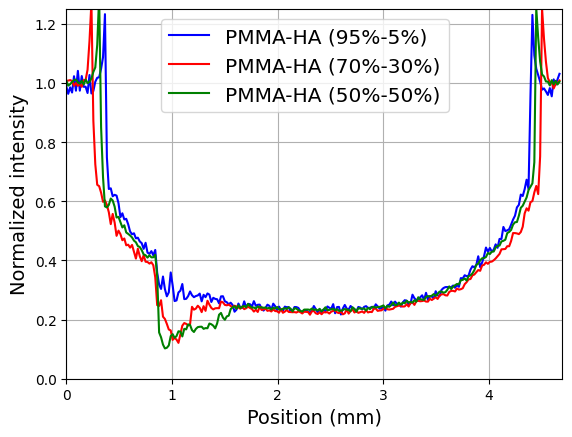

In [181]:
fig,ax=plt.subplots()
plt.plot(x_mm,PIPS, '-',label="PMMA-HA (95%-5%)", color="blue")
plt.plot(x_mm,PIPI, '-',label="PMMA-HA (70%-30%)", color="red")
plt.plot(x_mm,PIPC, '-',label="PMMA-HA (50%-50%)", color="green")
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.17, 1.),mode = "Expand", ncol=1,fontsize=14.5)
#plt.savefig(nameC+"/"+nameV+"/PData/PIEx-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

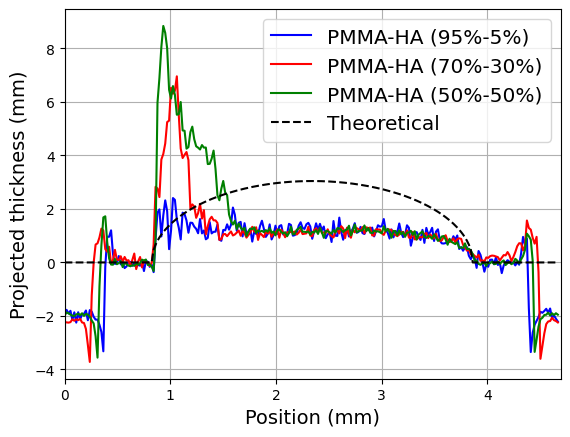

In [182]:
fig,ax=plt.subplots()
plt.plot(x_mm,PIThPS, '-',label="PMMA-HA (95%-5%)", color="blue")
plt.plot(x_mm,PIThPI, '-',label="PMMA-HA (70%-30%)", color="red")
plt.plot(x_mm,PIThPC, '-',label="PMMA-HA (50%-50%)", color="green")
plt.plot(x_mm,TestSiK*1000, '--',label="Theoretical", color="black")
plt.ylabel("Projected thickness (mm)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
#plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(1.0, 1.),mode = "Expand", ncol=1,fontsize=14.5)
#plt.savefig(nameC+"/"+nameV+"/PData/PIThEx-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [183]:
PISD1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameA+"/PData/RAWPIEx.Txt")
PISD2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameB+"/PData/RAWPIEx.Txt")
PISD3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameZ+"/PData/RAWPIEx.Txt")
PIThSD1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameA+"/PData/ThPIEx.Txt")
PIThSD2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameB+"/PData/ThPIEx.Txt")
PIThSD3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameZ+"/PData/ThPIEx.Txt")
PIAD1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameA+"/PData/RAWPIEx.Txt")
PIAD2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameB+"/PData/RAWPIEx.Txt")
PIAD3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameZ+"/PData/RAWPIEx.Txt")
PIThAD1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameA+"/PData/ThPIEx.Txt")
PIThAD2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameB+"/PData/ThPIEx.Txt")
PIThAD3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameZ+"/PData/ThPIEx.Txt")
PIID1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameA+"/PData/RAWPIEx.Txt")
PIID2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameB+"/PData/RAWPIEx.Txt")
PIID3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameZ+"/PData/RAWPIEx.Txt")
PIThID1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameA+"/PData/ThPIEx.Txt")
PIThID2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameB+"/PData/ThPIEx.Txt")
PIThID3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameZ+"/PData/ThPIEx.Txt")

In [184]:
SPISD1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameA+"/PData/RAWPISim.Txt")
SPISD2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameB+"/PData/RAWPISim.Txt")
SPISD3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameZ+"/PData/RAWPISim.Txt")
SPIThSD1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameA+"/PData/ThPISim.Txt")
SPIThSD2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameB+"/PData/ThPISim.Txt")
SPIThSD3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameD+"/"+nameZ+"/PData/ThPISim.Txt")
SPIAD1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameA+"/PData/RAWPISim.Txt")
SPIAD2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameB+"/PData/RAWPISim.Txt")
SPIAD3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameZ+"/PData/RAWPISim.Txt")
SPIThAD1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameA+"/PData/ThPISim.Txt")
SPIThAD2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameB+"/PData/ThPISim.Txt")
SPIThAD3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameF+"/"+nameZ+"/PData/ThPISim.Txt")
SPIID1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameA+"/PData/RAWPISim.Txt")
SPIID2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameB+"/PData/RAWPISim.Txt")
SPIID3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameZ+"/PData/RAWPISim.Txt")
SPIThID1=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameA+"/PData/ThPISim.Txt")
SPIThID2=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameB+"/PData/ThPISim.Txt")
SPIThID3=np.genfromtxt(nameC+"/"+nameVV+"/"+nameL+"/"+nameZ+"/PData/ThPISim.Txt")

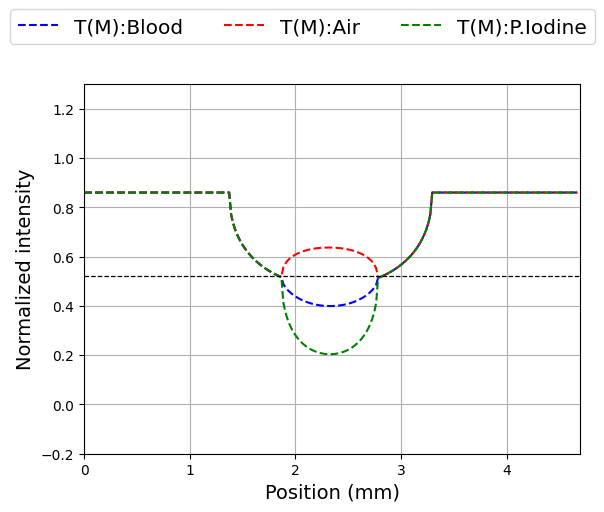

In [213]:
G1=-0.14
#H1=0.53
#Y1=0.67
#Y2=0.445
#Y3=0.352
H1=0.52
Y1=0.64
Y2=0.4
Y3=0.21
fig,ax=plt.subplots()
#plt.plot(x_mm,PISD1, '-',label="E(P):Blood", color="blue")
plt.plot(x_mm,LB_LA1S+G1, '--',label="T(M):Blood", color="blue")
#plt.plot(x_mm,PIAD1, '-',label="E(P):Air", color="red")
plt.plot(x_mm,LB_LA1A+G1, '--',label="T(M):Air", color="red")
#plt.plot(x_mm,PIID1, '-',label="E(P):P.Iodine", color="green")
plt.plot(x_mm,LB_LA1Y+G1, '--',label="T(M):P.Iodine", color="green")
plt.axhline(y=H1, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y1, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y2, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y3, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(-0.2,1.3)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(1.05, 1.23),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIEx1-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

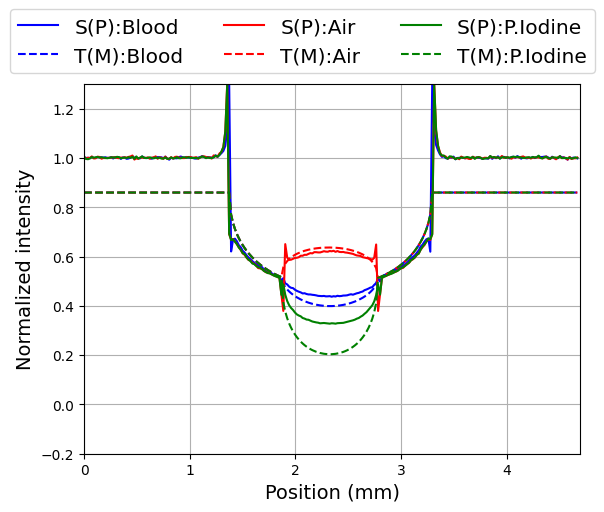

In [186]:
H2=0.52
Y4=0.62
Y5=0.441
Y6=0.334
fig,ax=plt.subplots()
plt.plot(x_mm,SPISD1, '-',label="S(P):Blood", color="blue")
plt.plot(x_mm,LB_LA1S+G1, '--',label="T(M):Blood", color="blue")
plt.plot(x_mm,SPIAD1, '-',label="S(P):Air", color="red")
plt.plot(x_mm,LB_LA1A+G1, '--',label="T(M):Air", color="red")
plt.plot(x_mm,SPIID1, '-',label="S(P):P.Iodine", color="green")
plt.plot(x_mm,LB_LA1Y+G1, '--',label="T(M):P.Iodine", color="green")
#plt.axhline(y=H2, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y4, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y5, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y6, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(-0.2,1.3)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(1.05, 1.23),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PISim1-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

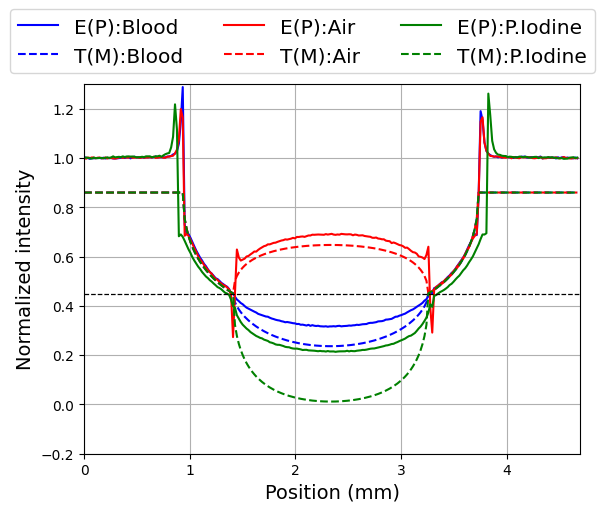

In [200]:
H3=0.45
HH3=0.47
#Y7=0.691
#Y8=0.319
#Y9=0.218
Y7=0.653
Y8=0.238
Y9=0.012
fig,ax=plt.subplots()
plt.plot(x_mm,PISD2, '-',label="E(P):Blood", color="blue")
plt.plot(x_mm,LB_LA2S+G1, '--',label="T(M):Blood", color="blue")
plt.plot(x_mm,PIAD2, '-',label="E(P):Air", color="red")
plt.plot(x_mm,LB_LA2A+G1, '--',label="T(M):Air", color="red")
plt.plot(x_mm,PIID2, '-',label="E(P):P.Iodine", color="green")
plt.plot(x_mm,LB_LA2Y+G1, '--',label="T(M):P.Iodine", color="green")
plt.axhline(y=H3, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=HH3, xmin=0, xmax=255,linestyle="-", color="black",linewidth=0.9)
#plt.axhline(y=Y7, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y8, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y9, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(-0.2,1.3)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(1.05, 1.23),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIEx2-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

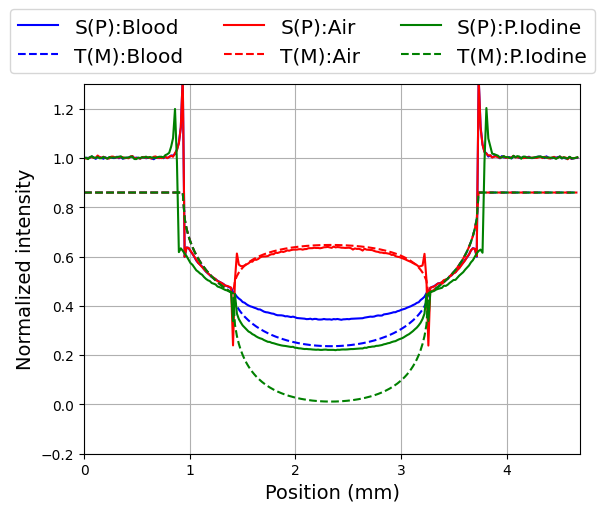

In [207]:
H4=0.475
HH4=0.46
Y10=0.634
Y11=0.348
Y12=0.223
fig,ax=plt.subplots()
plt.plot(x_mm,SPISD2, '-',label="S(P):Blood", color="blue")
plt.plot(x_mm,LB_LA2S+G1, '--',label="T(M):Blood", color="blue")
plt.plot(x_mm,SPIAD2, '-',label="S(P):Air", color="red")
plt.plot(x_mm,LB_LA2A+G1, '--',label="T(M):Air", color="red")
plt.plot(x_mm,SPIID2, '-',label="S(P):P.Iodine", color="green")
plt.plot(x_mm,LB_LA2Y+G1, '--',label="T(M):P.Iodine", color="green")
#plt.axhline(y=H4, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=HH4, xmin=0, xmax=255,linestyle="-", color="black",linewidth=0.9)
#plt.axhline(y=Y10, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y11, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y12, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(-0.2,1.3)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(1.05, 1.23),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PISim2-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

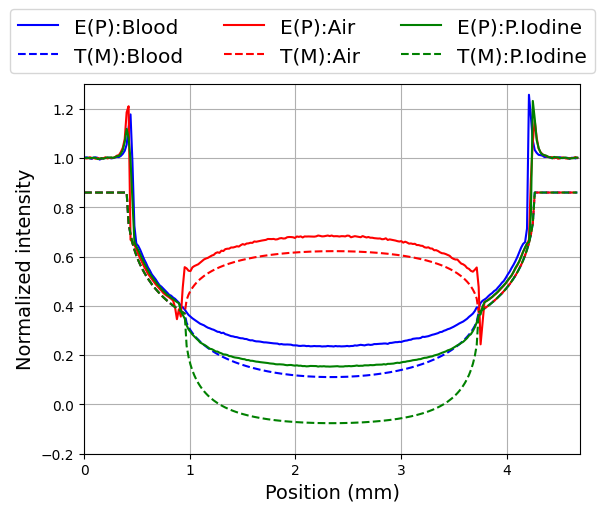

In [211]:
#H5=0.41
#Y13=0.684
#Y14=0.237
#Y15=0.153
H5=0.37
Y13=0.622
Y14=0.115
Y15=-0.07
fig,ax=plt.subplots()
plt.plot(x_mm,PISD3, '-',label="E(P):Blood", color="blue")
plt.plot(x_mm,LB_LA3S+G1, '--',label="T(M):Blood", color="blue")
plt.plot(x_mm,PIAD3, '-',label="E(P):Air", color="red")
plt.plot(x_mm,LB_LA3A+G1, '--',label="T(M):Air", color="red")
plt.plot(x_mm,PIID3, '-',label="E(P):P.Iodine", color="green")
plt.plot(x_mm,LB_LA3Y+G1, '--',label="T(M):P.Iodine", color="green")
#plt.axhline(y=H5, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y13, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y14, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y15, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(-0.2,1.3)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(1.05, 1.23),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIEx3-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

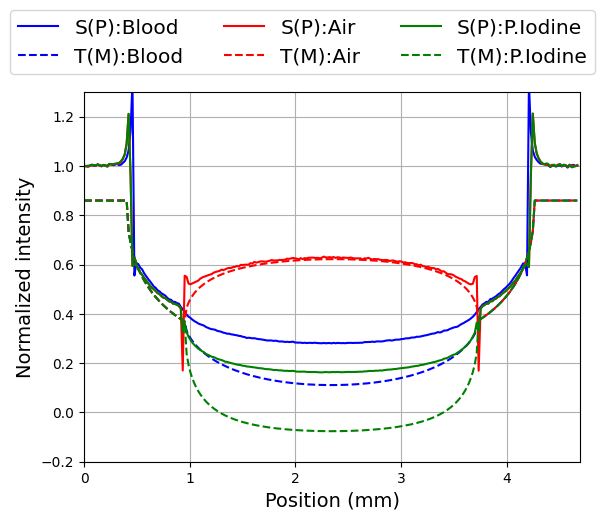

In [190]:
H6=0.434
Y16=0.629
Y17=0.282
Y18=0.163
fig,ax=plt.subplots()
plt.plot(x_mm,SPISD3, '-',label="S(P):Blood", color="blue")
plt.plot(x_mm,LB_LA3S+G1, '--',label="T(M):Blood", color="blue")
plt.plot(x_mm,SPIAD3, '-',label="S(P):Air", color="red")
plt.plot(x_mm,LB_LA3A+G1, '--',label="T(M):Air", color="red")
plt.plot(x_mm,SPIID3, '-',label="S(P):P.Iodine", color="green")
plt.plot(x_mm,LB_LA3Y+G1, '--',label="T(M):P.Iodine", color="green")
#plt.axhline(y=H6, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y16, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y17, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y18, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Normalized intensity",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
plt.ylim(-0.2,1.3)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(1.05, 1.25),mode = "Expand", ncol=3,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PISim3-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

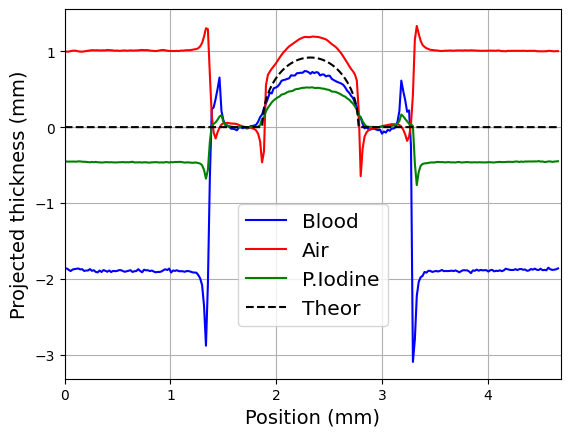

In [191]:
H7=0.92
Y19=1.2
Y20=0.72
Y21=0.51
fig,ax=plt.subplots()
plt.plot(x_mm,PIThSD1+0.05, '-',label="Blood", color="blue")
plt.plot(x_mm,PIThAD1, '-',label="Air", color="red")
plt.plot(x_mm,PIThID1, '-',label="P.Iodine", color="green")
plt.plot(x_mm,TestEsC*1000, '--',label="Theor", color="black")
#plt.axhline(y=H7, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y19, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y20, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y21, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Projected thickness (mm)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
#plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.5, 0.5),mode = "Expand", ncol=1,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIThEx1-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

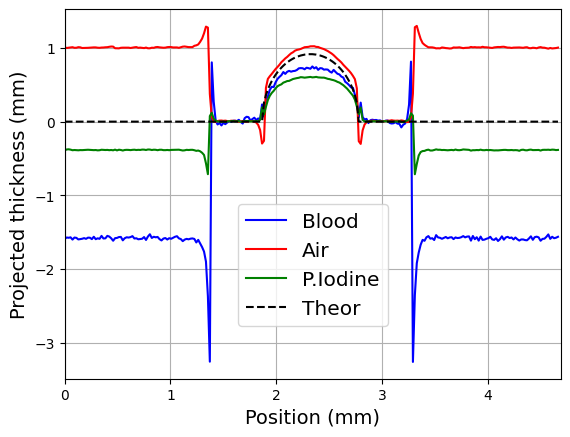

In [192]:
Y22=1.04
Y23=0.72
Y24=0.61
fig,ax=plt.subplots()
plt.plot(x_mm,SPIThSD1+0.05, '-',label="Blood", color="blue")
plt.plot(x_mm,SPIThAD1, '-',label="Air", color="red")
plt.plot(x_mm,SPIThID1, '-',label="P.Iodine", color="green")
plt.plot(x_mm,TestEsC*1000, '--',label="Theor", color="black")
#plt.axhline(y=H7, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y22, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y23, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y24, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Projected thickness (mm)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
#plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.5, 0.5),mode = "Expand", ncol=1,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIThSim1-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

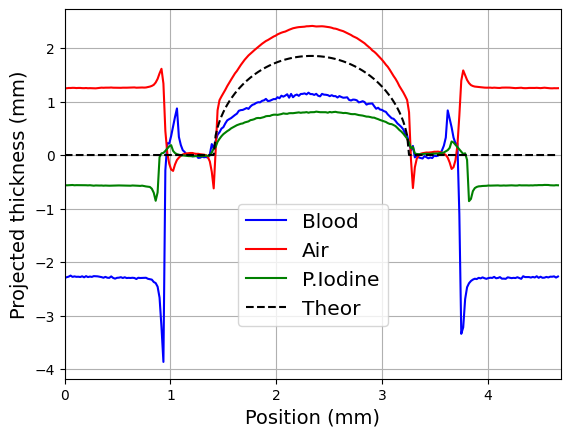

In [193]:
H8=1.85
Y25=2.41
Y26=1.14
Y27=0.8
fig,ax=plt.subplots()
plt.plot(x_mm,PIThSD2, '-',label="Blood", color="blue")
plt.plot(x_mm,PIThAD2, '-',label="Air", color="red")
plt.plot(x_mm,PIThID2, '-',label="P.Iodine", color="green")
plt.plot(x_mm,TestSiC*1000, '--',label="Theor", color="black")
#plt.axhline(y=H8, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y25, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y26, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y27, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Projected thickness (mm)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
#plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.5, 0.5),mode = "Expand", ncol=1,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIThEx2-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

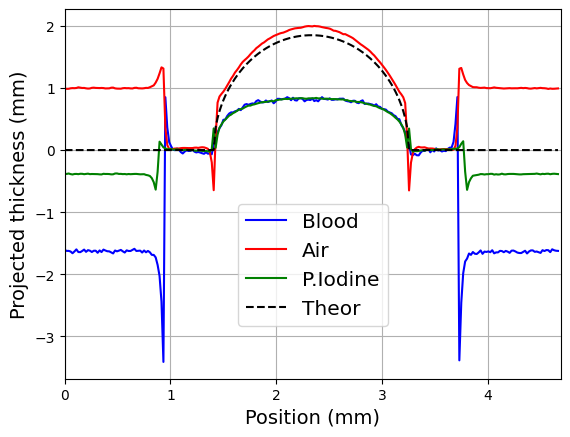

In [194]:
Y28=2.
Y29=0.8
Y30=0.8
fig,ax=plt.subplots()
plt.plot(x_mm,SPIThSD2, '-',label="Blood", color="blue")
plt.plot(x_mm,SPIThAD2, '-',label="Air", color="red")
plt.plot(x_mm,SPIThID2, '-',label="P.Iodine", color="green")
plt.plot(x_mm,TestSiC*1000, '--',label="Theor", color="black")
#plt.axhline(y=H8, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y28, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y29, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y30, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Projected thickness (mm)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
#plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.5, 0.5),mode = "Expand", ncol=1,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIThSim2-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

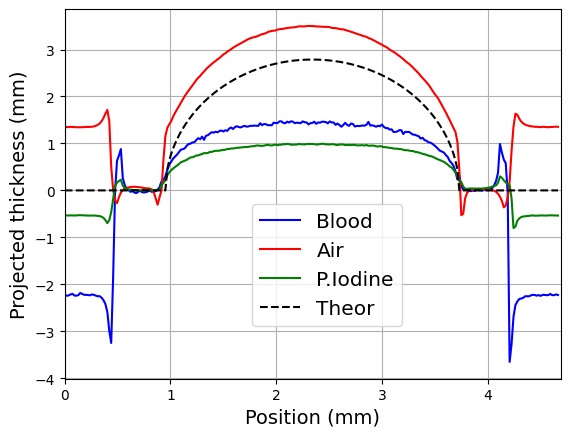

In [195]:
H9=2.82
Y31=3.5
Y32=1.47
Y33=1
fig,ax=plt.subplots()
plt.plot(x_mm,PIThSD3, '-',label="Blood", color="blue")
plt.plot(x_mm,PIThAD3, '-',label="Air", color="red")
plt.plot(x_mm,PIThID3, '-',label="P.Iodine", color="green")
plt.plot(x_mm,TestSiF*1000, '--',label="Theor", color="black")
#plt.axhline(y=H9, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y31, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y32, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y33, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Projected thickness (mm)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
#plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.7, 0.5),mode = "Expand", ncol=1,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIThEx3-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

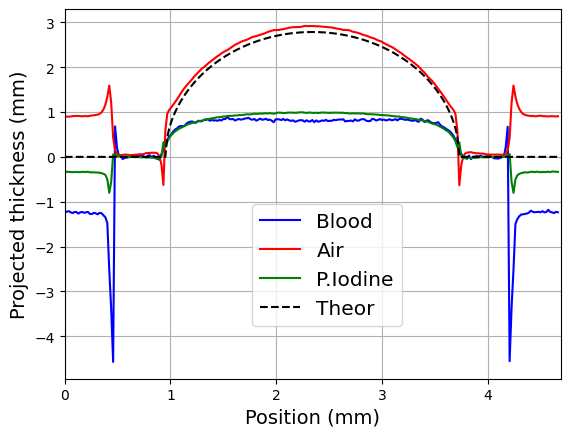

In [196]:
Y34=2.92
Y35=0.9
Y36=1
fig,ax=plt.subplots()
plt.plot(x_mm,SPIThSD3, '-',label="Blood", color="blue")
plt.plot(x_mm,SPIThAD3, '-',label="Air", color="red")
plt.plot(x_mm,SPIThID3, '-',label="P.Iodine", color="green")
plt.plot(x_mm,TestSiF*1000, '--',label="Theor", color="black")
#plt.axhline(y=H9, xmin=0, xmax=255,linestyle="--", color="black",linewidth=0.9)
#plt.axhline(y=Y34, xmin=0, xmax=255,linestyle="--", color="red",linewidth=0.9)
#plt.axhline(y=Y35, xmin=0, xmax=255,linestyle="--", color="blue",linewidth=0.9)
#plt.axhline(y=Y36, xmin=0, xmax=255,linestyle="--", color="green",linewidth=0.9)
plt.ylabel("Projected thickness (mm)",fontsize=14)
plt.xlabel("Position (mm)",fontsize=14)
plt.grid()
#plt.ylim(0.0,1.25)
plt.xlim(0.0,np.round((Npixeles*a*(10**(3)))/M,3))
plt.legend(bbox_to_anchor=(0.7, 0.5),mode = "Expand", ncol=1,fontsize=14.5)
#plt.savefig(nameC+"/"+nameVV+"/PData/PIThSim3-A.jpeg", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)